In [16]:
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
#import datetime as dt
from datetime import timedelta,datetime
import dateutil.parser as dparser
from urllib.request import urlopen
import urllib.request as Request
import re
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options

In [253]:
driver = webdriver.Chrome()
driver.get('https://seekingalpha.com/symbol/AAPL')
url =driver.command_executor._url # http://127.0.0.1:62149
session_id = driver.session_id # 068b49f90bfb36f154617a0ad0c5e745
driver = webdriver.Remote(command_executor=url,desired_capabilities={})
driver.session_id = session_id
print(driver.session_id)


599558e42a06cbfc185b0cf0cbd8ee69


<html itemscope="" itemtype="http://schema.org/WebPage" lang="en"><head><meta charset="utf-8"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="width=device-width" name="viewport"/><title>Apple Inc. (AAPL) Stock Analysis &amp; News | Seeking Alpha</title><meta content="Seeking Alpha" name="application-name"/><meta content="true" name="HandheldFriendly"/><meta content="com.seekingalpha.Web" name="appleid-signin-client-id"/><meta content="name email" name="appleid-signin-scope"/><meta content="https://seekingalpha.com/auth/apple/sign-in" name="appleid-signin-redirect-uri"/><meta content="/symbol/AAPL?s=aapl&amp;source=search" name="appleid-signin-state"/><meta content="noodp,noydir" name="robots"/><meta content="Get breaking news and analysis on Apple Inc. (AAPL) stock, price quote and chart, trading and investing tools." lang="en-US" name="description"/><meta content="https://static3.seekingalpha.com/assets/og_image_192-59bfd51c9fe6af025b2f9f96c807e46f8e2f06c5ae787b1
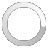

In [8]:
soup1=[]
web_url="https://seekingalpha.com/symbol/AAPL"
driver = webdriver.Chrome()
driver.set_page_load_timeout(600)
driver.get(web_url)
res = driver.execute_script("return document.documentElement.outerHTML")
driver.quit()
soup = BeautifulSoup(res, 'lxml')
soup

In [248]:
#driver.find_element_by_tag_name('body').send_keys(Keys.CONTROL + 't')
#driver = webdriver.Chrome()
 
driver.get('https://seekingalpha.com/symbol/AAPL')

res = driver.execute_script("return document.documentElement.outerHTML")
#driver.quit()
#soup1 = BeautifulSoup(res, 'lxml')
#soup1

MaxRetryError: HTTPConnectionPool(host='127.0.0.1', port=63016): Max retries exceeded with url: /session/8e922b3c6c9166496a508c6b72675450/url (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000000B7B4808438>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

In [35]:
all_contents=soup1.select("div.symbol_latest_articles")
#all_contents

In [109]:
tmp=all_contents[0].select("li")[0]
all_contents[2].select("li")[0].find("div",{"class":"symbol_article"}).find('a').text

IndexError: list index out of range

In [93]:
tmp1=tmp.select("div.symbol_article > a[href]")
tmp1

[<a href="/news/3521065-trump-says-china-stepping-up-talks-exempt-apple-tariffs" sasource="qp_latest_1">Trump says China not 'stepping up' in talks, could exempt Apple from tariffs</a>]

In [99]:
tmp.find("div",{"class":"symbol_article"}).find('a').text

"Trump says China not 'stepping up' in talks, could exempt Apple from tariffs"

In [24]:
all_contents=soup.select("div.symbol_latest_articles")
news=all_contents[0].select("li")
for index,line in enumerate(news):
    try:
        title=line.find("div",{"class":"symbol_article"}).find('a').text
        tmp_url=line.find("div",{"class":"symbol_article"}).find('a')['href']
        urls="https://seekingalpha.com"+tmp_url
        tmp_date=line.select("div.date_on_by >span")[2].text
        if tmp_date.find('Yesterday')==1:
            date=(datetime.today() - timedelta(days=1)).strftime('%Y%m%d')
        else:
            date=dparser.parse(tmp_date,fuzzy=True).strftime('%Y%m%d')          
        print(str(index)+"  "+title+' '+urls+' '+date)
    except (AttributeError,IndexError) as e:
        pass

0  JDI could sell plant to Apple, Sharp - Nikkei https://seekingalpha.com/news/3528577-jdi-sell-plant-to-apple-sharp-nikkei 20191229
1  Wedbush raises Apple on 5G tailwind https://seekingalpha.com/news/3528095-wedbush-raises-apple-on-5g-tailwind 20191223
2  Apple works on satellite-to-device tech https://seekingalpha.com/news/3528035-apple-works-on-satellite-to-device-tech 20191221
3  Piper raises Apple on early 5G strength https://seekingalpha.com/news/3527918-piper-raises-apple-on-early-5g-strength 20191220
4  Bernstein sees big 2020 for Apple's AirPods https://seekingalpha.com/news/3527698-bernstein-sees-big-2020-for-apples-airpods 20191220
5  Apple, Samsung phones pass FCC RF radiation test https://seekingalpha.com/news/3527532-apple-samsung-phones-pass-fcc-rf-radiation-test 20191219
6  Apple eyes James Bond, Pac-12 content https://seekingalpha.com/news/3527516-apple-eyes-james-bond-pacminus-12-content 20191219
13  Amazon, Google partner on smart home standard https://seekingalpha.

ValueError: ('String does not contain a date:', 'â€¢')

<html itemscope="" itemtype="http://schema.org/WebPage" lang="en"><head><meta charset="utf-8"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="width=device-width" name="viewport"/><title>Apple Inc. (AAPL) Stock Analysis &amp; News | Seeking Alpha</title><meta content="Seeking Alpha" name="application-name"/><meta content="true" name="HandheldFriendly"/><meta content="com.seekingalpha.Web" name="appleid-signin-client-id"/><meta content="name email" name="appleid-signin-scope"/><meta content="https://seekingalpha.com/auth/apple/sign-in" name="appleid-signin-redirect-uri"/><meta content="/symbol/AAPL?s=aapl&amp;source=search" name="appleid-signin-state"/><meta content="noodp,noydir" name="robots"/><meta content="Get breaking news and analysis on Apple Inc. (AAPL) stock, price quote and chart, trading and investing tools." lang="en-US" name="description"/><meta content="https://static3.seekingalpha.com/assets/og_image_192-59bfd51c9fe6af025b2f9f96c807e46f8e2f06c5ae787b1
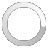

In [12]:
with open("G:\\Desktop\\UM Master Data Science\\DS project\\News_data\\Apple\\apple.txt") as f:
    soup = BeautifulSoup(f.read())
soup

In [140]:
tmp=all_contents[0].select("li")[7]
#tmp.select("div.date_on_by >span")[2].text
tmp

<li class="other_main">More From Our Partners</li>

In [161]:
news[7].find("div",{"class":"symbol_article"}).find('a').text

AttributeError: 'NoneType' object has no attribute 'find'

<html itemscope="" itemtype="http://schema.org/WebPage" lang="en"><head><meta charset="utf-8"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="width=device-width" name="viewport"/><title>Stock buybacks jumped 6.3% in Q3 - Apple Inc. (NASDAQ:AAPL) | Seeking Alpha</title><meta content="Seeking Alpha" name="application-name"/><meta content="true" name="HandheldFriendly"/><meta content="com.seekingalpha.Web" name="appleid-signin-client-id"/><meta content="name email" name="appleid-signin-scope"/><meta content="https://seekingalpha.com/auth/apple/sign-in" name="appleid-signin-redirect-uri"/><meta content="/news/3526868-stock-buybacks-jumped-6_3-in-q3" name="appleid-signin-state"/><meta content="noodp,noydir" name="robots"/><meta content='Preliminary Q3 S&amp;P 500 stock buybacks rise to $175.9B, halting two quarters of declines, S&amp;P Dow Jones Indices reports. "After lowering expenditures in the' lang="en-US" name="description"/><meta content="Liz Kiesche" name="auth
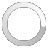

In [25]:
driver = webdriver.Chrome()
 
driver.get('https://seekingalpha.com/news/3526868-stock-buybacks-jumped-6_3-in-q3')
#driver.find_element_by_tag_name('body').send_keys(Keys.CONTROL + 't')
res = driver.execute_script("return document.documentElement.outerHTML")
driver.quit()
soup2 = BeautifulSoup(res, 'lxml')
soup2

In [26]:
comment=soup2.select("div.b-c-content")

comments=[]
for index,line in enumerate(comment):
    user_comment=re.sub(r'<.*?>','',str(line))
    comment_time=soup2.find_all("div",{"class":"b-ft"})[int(index)].find("span").text.replace("\n","")
    comment_time=dparser.parse(comment_time,fuzzy=True).strftime('%Y/%m/%d')
    comments.append({"user_comment":user_comment,"comment_time":comment_time})

In [27]:
comment_df=pd.DataFrame(comments)
comment_df

,comment_time,user_comment
0,2019/12/21,"Citi, MRK.. JPM and COP fit the buyback chart...."
1,2019/12/20,"my piece of the Apple keeps getting bigger, wh..."
2,2019/12/18,Stock buybacks continued just as strong in Q4....
3,2019/12/18,Why doesn’t Apple raise its dividends instead ...
4,2019/12/18,it pays an increased dividend every May!
5,2019/12/18,Because paying dividends don’t get upper manag...
6,2019/12/19,That doesnt even make sense. Apple management...
7,2019/12/19,"I am talking about a “more serious” raise, som..."
8,2019/12/18,"Companies may buy shares, or pay dividends, or..."
9,2019/12/17,"If you're a CEO, you can choose between invest..."


In [13]:
path="G:\\Desktop\\UM Master Data Science\\DS project\\News_data\\SeekingAlpha_Comments_"+'{0:%Y%m%d_%H%M%S}'.format(dt.datetime.now())+'.csv'
comment_df.to_csv(path)